# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



1.

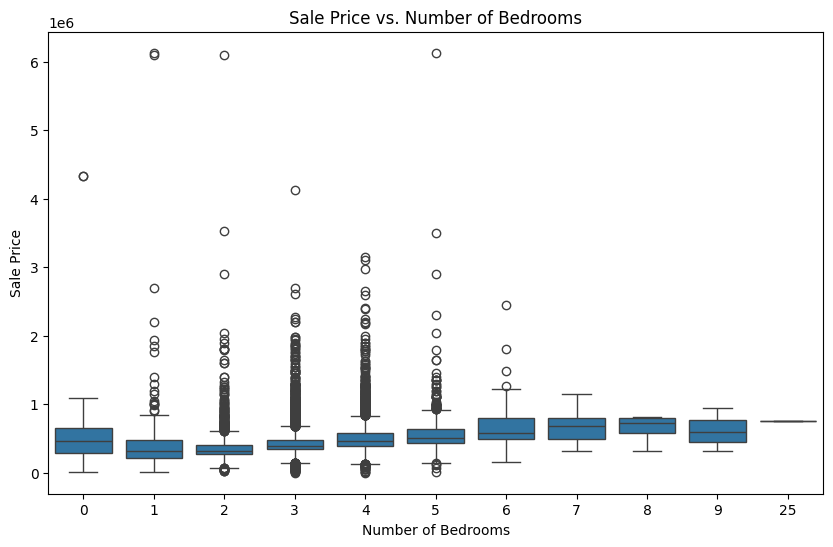

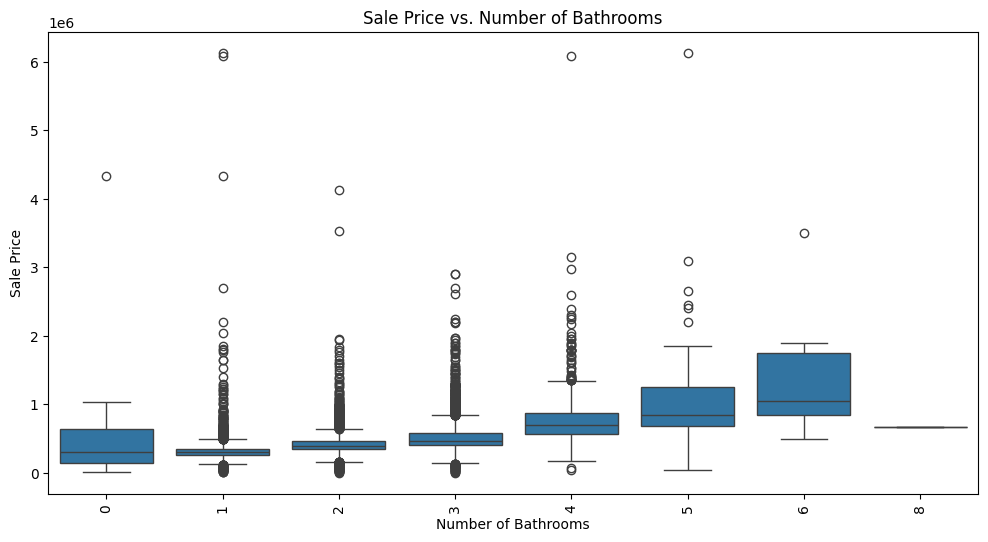

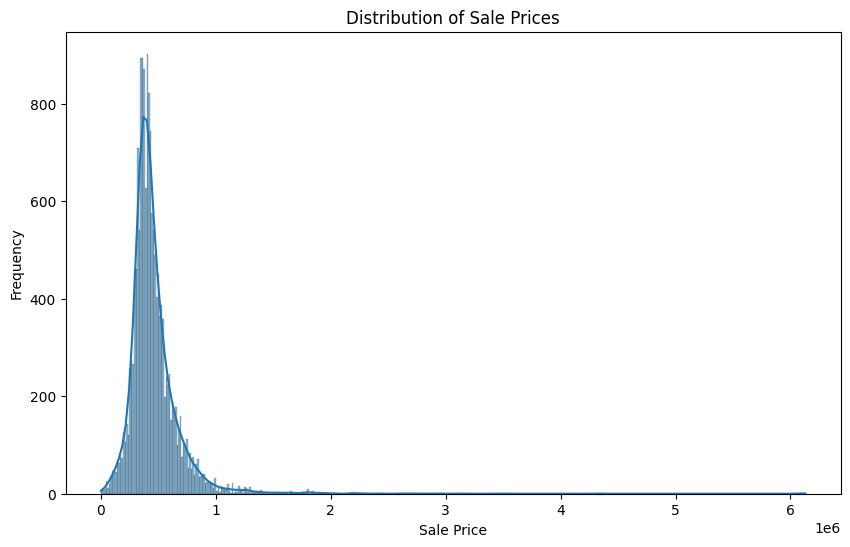

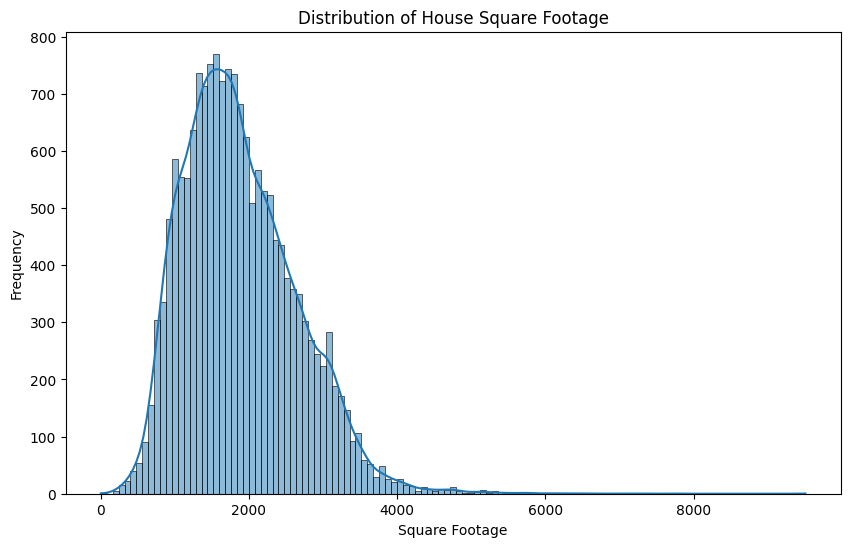

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./pierce_county_house_sales.csv')

#cleaning

# Fill missing values
df['exterior'] = df['exterior'].fillna('Unknown')
df['interior'] = df['interior'].fillna('Unknown')
df['roof_cover'] = df['roof_cover'].fillna('Unknown')
df['waterfront_type'] = df['waterfront_type'].fillna('No Waterfront')
df['view_quality'] = df['view_quality'].fillna('No View')

#plots

# Plot sale price v number of bedrooms
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='sale_price', data=df)
plt.title("Sale Price vs. Number of Bedrooms")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Sale Price")
plt.show()

#Plot sale price vs. number of bathrooms
plt.figure(figsize=(12, 6))
sns.boxplot(x='bathrooms', y='sale_price', data=df)
plt.xticks(rotation=90)
plt.title("Sale Price vs. Number of Bathrooms")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Sale Price")
plt.show()

# Plot sale price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['sale_price'], kde=True)
plt.title("Distribution of Sale Prices")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()

# Plot square footage distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['house_square_feet'], kde=True)
plt.title("Distribution of House Square Footage")
plt.xlabel("Square Footage")
plt.ylabel("Frequency")
plt.show()


2.

In [11]:
categorical_columns = ['hvac_description', 'exterior', 'interior', 'roof_cover', 'waterfront_type', 'view_quality', 'utility_sewer']

# one-hot encoding
data_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=False)


3.

In [14]:
from sklearn.model_selection import train_test_split
X = data_encoded.drop(columns=['sale_price', 'sale_date'])  # Drop 'sale_date' and 'sale_price' from features
y = data_encoded['sale_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


4.

In [22]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

#full feature model

print("Full Feature Model\n-------------------------")
reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Display results for both sets
print("Training Set Performance:")
print(f"R squared: {reg.score(X_train, y_train)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred))}")

print("\nTest Set Performance:")
print(f"R squared: {reg.score(X_test, y_test)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred))}\n")

# Create 4 simple models with different feature subsets (progressively consider more features)
print("Comparing Simple Models with Different Feature Sets\n-------------------------")
feature_sets = [
    ['house_square_feet'],
    ['house_square_feet', 'bedrooms'],
    ['house_square_feet', 'bedrooms', 'bathrooms'],
    ['house_square_feet', 'bedrooms', 'bathrooms', 'stories']
]

for features in feature_sets:
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]

    # Initialize model
    reg = linear_model.LinearRegression(fit_intercept=False)
    reg.fit(X_train_subset, y_train)

    # Predict
    y_train_pred = reg.predict(X_train_subset)
    y_test_pred = reg.predict(X_test_subset)

    # Display results
    print(f"Features: {features}")
    print(f"Training RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred))}, Training R squared: {r2_score(y_train, y_train_pred)}")
    print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred))}, Test R squared: {r2_score(y_test, y_test_pred)}\n")


Full Feature Model
-------------------------
Training Set Performance:
R^2: 0.5349194793842331
RMSE: 157240.30528418996

Test Set Performance:
R^2: 0.50614292695491
RMSE: 180545.44473503996

Comparing Simple Models with Different Feature Sets
-------------------------
Features: ['house_square_feet']
Training RMSE: 204154.59771056808, Training R^2: 0.21599519702832048
Test RMSE: 226788.9120299701, Test R^2: 0.2207589147845933

Features: ['house_square_feet', 'bedrooms']
Training RMSE: 202907.8409938084, Training R^2: 0.22554167423581317
Test RMSE: 226775.4354632086, Test R^2: 0.22085152233226402

Features: ['house_square_feet', 'bedrooms', 'bathrooms']
Training RMSE: 201156.63786959933, Training R^2: 0.23885196645079243
Test RMSE: 225168.14749957385, Test R^2: 0.2318569297358809

Features: ['house_square_feet', 'bedrooms', 'bathrooms', 'stories']
Training RMSE: 200794.20716018847, Training R^2: 0.2415922678245095
Test RMSE: 224533.17859789453, Test R^2: 0.23618311218720311



Best Model: The Full Feature Model is the best-performing model because it has the highest R squared value and the lowest RMSE on the test set. Adding more features improved the model’s performance (R squared value rose, RMSE value fel) among the simple models.


5.

In [23]:
#log transformations
data_encoded['log_square_feet'] = np.log(data_encoded['house_square_feet'] + 1)  # price increases with square footage has diminishing returns
data_encoded['bedrooms_squared'] = data_encoded['bedrooms'] ** 2
data_encoded['bathrooms_sqrt'] = np.sqrt(data_encoded['bathrooms'])

# interaction terms
data_encoded['sqft_bathrooms'] = data_encoded['house_square_feet'] * data_encoded['bathrooms']#the impact of square footage on price might depend on the number of bedrooms or bathrooms.
data_encoded['sqft_bedrooms'] = data_encoded['house_square_feet'] * data_encoded['bedrooms']
data_encoded['bed_bath_interaction'] = data_encoded['bedrooms'] * data_encoded['bathrooms']#price may depend on the combined effect of bedrooms and bathrooms.

#split
X_complex = data_encoded.drop(columns=['sale_price', 'sale_date'])  # Drop target and non-informative column
y_complex = data_encoded['sale_price']
X_train_complex, X_test_complex, y_train_complex, y_test_complex = train_test_split(X_complex, y_complex, test_size=0.2, random_state=42)

#initialize model
complex_model = LinearRegression(fit_intercept=False)
complex_model.fit(X_train_complex, y_train_complex)

y_train_pred_complex = complex_model.predict(X_train_complex)
y_test_pred_complex = complex_model.predict(X_test_complex)

# display results for both sets
print("Complex Model Training Set Performance:")
print(f"R squared: {r2_score(y_train_complex, y_train_pred_complex)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train_complex, y_train_pred_complex))}")

print("\nComplex Model Test Set Performance:")
print(f"R squared: {r2_score(y_test_complex, y_test_pred_complex)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_complex, y_test_pred_complex))}")

Complex Model Training Set Performance:
R squared: 0.5451387610039952
RMSE: 155503.17774397443

Complex Model Test Set Performance:
R squared: 0.43737183955366743
RMSE: 192706.6177700491


The complex model has a higher R squared value and lower RMSE value than most of the simple models; however, this model has a lower R squared value and higher RMSE value than the full feature linear model created in the previous question.

6. Initially in this analysis, I did some EDA and cleaning as well as transformed/prepared the categorical variables for regression. I built several simple linear models using different subsets of features (progressively increasing the amount of features they included) and observed that models with fewer features generally underfit the data, evidenced by low R squared values and high RMSE values on the test set. These models were not complex enough and failed to capture key relationships, resulting in low predictive accuracy. I also constructed a simple full feature model, which incorporated all available variables and achieved the highest R squared value and lowest RMSE value on the test set. I also developed a more complex model that included log transformations and interaction terms between variables. It outperformed all of the simpler linear models, but did not surpass the full feature model. This suggests that increasing the model complexity can sometimes lead to progressively lower effectiveness past a certain point, especially if major relationships are well-represented already by available features and the simpler model.






